## Import Data

In [1]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
import urllib.request

In [2]:
def results_url(**kwargs):
    return "http://{host}/artifacts/{environment}/{repo_branch_name}/{commitid}/{variant}/{timestamp}/{timestamp}_{ocaml_version}.bench".format(**kwargs)

def load_bench_results(**kwargs):
    url = results_url(**kwargs)
    with urllib.request.urlopen(url) as f:
        xs = [json.loads(l) for l in f.read().decode().splitlines()]
        df = pdjson.json_normalize(xs)
    return df

commit_a = {
    'host': 'bench2.ocamllabs.io',
    'environment': 'bench2.ocamllabs.io',
    'repo_branch_name': 'ocaml_trunk__trunk',
    'commitid': '87fdcd336e6b3c3b60969c050c83e6c1ac49d392',
    'variant': 'vanilla',
    'timestamp': '20191018_000506',
    'ocaml_version': '4.10.0',
    }

commit_b = {
    'host': 'bench2.ocamllabs.io',
    'environment': 'bench2.ocamllabs.io',
    'repo_branch_name': 'ocaml_trunk__trunk',
    'commitid': 'ec77196cb2a578c9e00ae2bff761931e35821e6e',
    'variant': 'vanilla',
    'timestamp': '20191018_000506',
    'ocaml_version': '4.10.0',
    }

def load_commit(conf):
    df = load_bench_results(**conf)
    df['commitid'] = conf['commitid'][0:8]
    return df
    

df = pd.concat([load_commit(commit_a), load_commit(commit_b)])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 192
Data columns (total 25 columns):
command                            386 non-null object
gc.allocated_words                 386 non-null int64
gc.compactions                     386 non-null int64
gc.heap_chunks                     386 non-null int64
gc.heap_words                      386 non-null int64
gc.major_collections               386 non-null int64
gc.major_words                     386 non-null int64
gc.minor_collections               386 non-null int64
gc.minor_words                     386 non-null int64
gc.promoted_words                  386 non-null int64
gc.top_heap_words                  386 non-null int64
maxrss_kB                          386 non-null int64
name                               386 non-null object
ocaml.architecture                 386 non-null object
ocaml.c_compiler                   386 non-null object
ocaml.function_sections            386 non-null object
ocaml.supports_shared_libr

,gc.allocated_words,gc.compactions,gc.heap_chunks,gc.heap_words,gc.major_collections,gc.major_words,gc.minor_collections,gc.minor_words,gc.promoted_words,gc.top_heap_words,maxrss_kB,sys_time_secs,time_secs,user_time_secs
count,3.860000e+02,386.000000,386.000000,3.860000e+02,386.000000,3.860000e+02,386.000000,3.860000e+02,3.860000e+02,3.860000e+02,386.000000,386.000000,386.000000,386.000000
mean,2.778304e+08,7.699482,4.217617,3.143823e+06,84.531088,2.305999e+07,1072.409326,2.671680e+08,1.239756e+07,3.425251e+06,27874.445596,0.046929,2.482028,2.434284
std,1.007778e+09,51.000513,6.830360,1.022993e+07,342.226545,9.477452e+07,3848.602719,9.997601e+08,4.405757e+07,1.091574e+07,84788.897120,0.367774,7.375114,7.305343
min,8.900000e+01,0.000000,1.000000,6.144000e+04,0.000000,0.000000e+00,0.000000,8.900000e+01,0.000000e+00,4.915200e+05,2480.000000,0.000000,0.001139,0.000000
25%,9.818040e+05,0.000000,1.000000,4.915200e+05,0.000000,8.100000e+01,4.000000,9.818040e+05,7.700000e+01,4.915200e+05,4528.000000,0.000000,0.376916,0.376657
50%,5.000010e+07,0.000000,1.000000,4.915200e+05,2.000000,4.455200e+04,195.000000,4.590009e+07,1.847000e+03,4.915200e+05,5368.000000,0.000000,0.978552,0.977646
75%,9.003913e+07,2.000000,3.000000,5.652480e+05,38.000000,7.981390e+06,369.000000,8.765451e+07,3.567849e+06,6.087680e+05,9980.000000,0.004044,1.940270,1.937937
max,9.746759e+09,562.000000,39.000000,1.028572e+08,3361.000000,1.039654e+09,37210.000000,9.746743e+09,4.158070e+08,1.028572e+08,816808.000000,4.784167,86.906639,86.372274


In [3]:
df.head().T

,0,1,2,3,4
command,js_of_ocaml '--disable=check-magic-number' -,zarith_fib.exe Z 40,zarith_fact.exe 40 1_000_000,zarith_tak.exe Z 2500,zarith_pi.exe 5000
gc.allocated_words,1156022451,984,124001053,987,396115882
gc.compactions,1,0,2,0,214
gc.heap_chunks,7,1,1,1,16
gc.heap_words,31412736,491520,73728,491520,1515008
gc.major_collections,55,0,6,0,642
gc.major_words,277144894,0,3574,0,392716553
gc.minor_collections,4212,0,475,0,1075
gc.minor_words,1086816526,984,124001053,987,3411742
gc.promoted_words,207938969,0,3574,0,12413


## Table based comparison

In [4]:
def calc_compare_table(df, topic):
    tmp = pd.pivot_table(df, values=topic, index='name', columns='commitid')
    tmp = tmp.reset_index().rename_axis(None, axis=1)
    id1 = df.commitid.unique()[0] 
    id2 = df.commitid.unique()[1]
    tmp = tmp[['name', id1, id2]]
    tmp['diff'] = tmp[id2] - tmp[id1]
    tmp['pct_diff'] = 100.*tmp['diff']/tmp[id1]
    return tmp
    
    
def display_compare_table(df, N=4):
    print('Top %d percentage increases'%N)
    display(df.sort_values('pct_diff', ascending=False).head(N))

    print('Top %d percentage decreases'%N)
    display(df.sort_values('pct_diff', ascending=True).head(N))


In [5]:
tmp = calc_compare_table(df, 'time_secs')
display_compare_table(tmp)

Top 4 percentage increases


,name,87fdcd33,ec77196c,diff,pct_diff
92,map_bench.map_fold.10000,0.920088,1.001993,0.081905,8.901853
22,bytes_bench.bytes_uppercase_ascii.1000000,2.200205,2.216039,0.015834,0.719664
165,string_bench.string_uppercase_ascii.1000000,2.309901,2.325648,0.015747,0.681710
44,hashtbl_bench.hashtbl_filter_map.100000,3.072019,3.080959,0.008940,0.291005


Top 4 percentage decreases


,name,87fdcd33,ec77196c,diff,pct_diff
123,set_bench.set_fold.1000000,9.725045,8.969196,-0.755849,-7.772189
144,stress.10000.100,1.066776,1.025177,-0.041599,-3.899488
93,map_bench.map_for_all.10000,0.911950,0.896978,-0.014972,-1.641753
120,sauvola,14.970539,14.882872,-0.087667,-0.585597


## Time

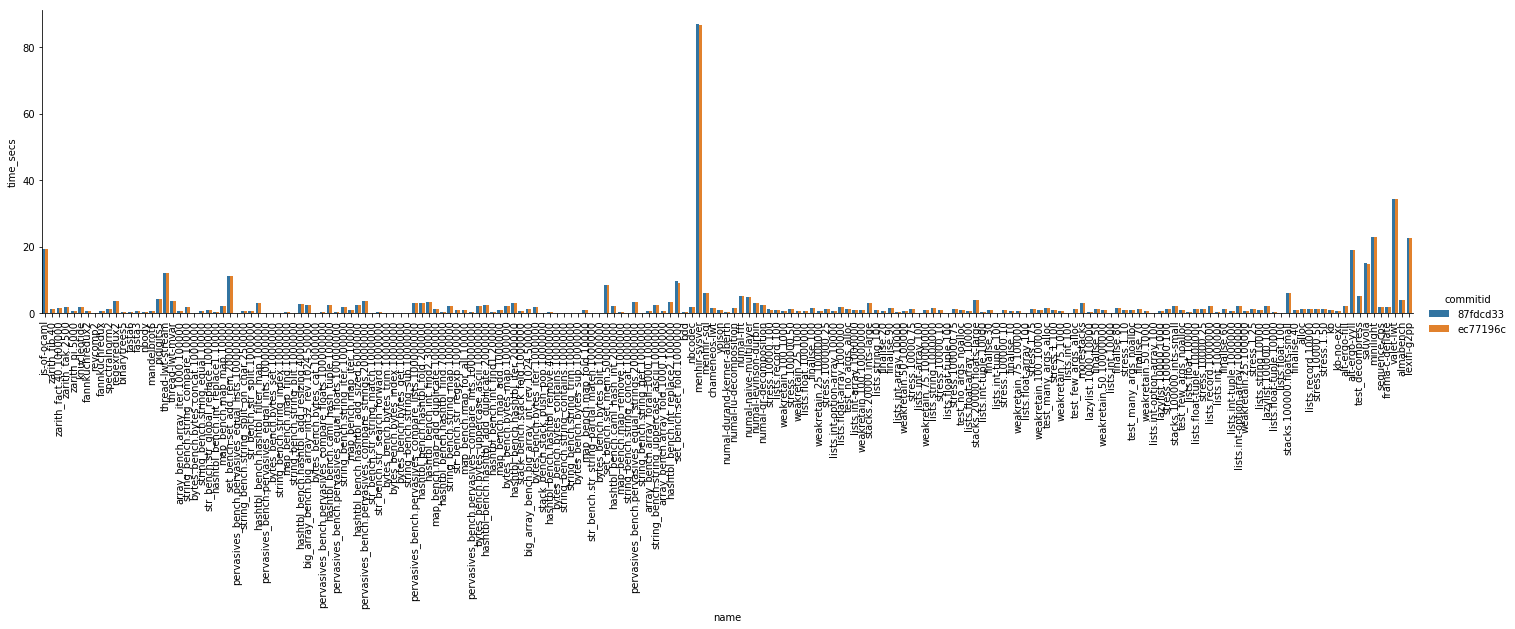

In [6]:
g = sns.catplot (x='name', y='time_secs', hue='commitid', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [7]:
base_commitid = df.commitid.unique()[0]
print('For normalization using base_commitid: '+base_commitid)

For normalization using base_commitid: 87fdcd33


In [8]:
def normalize(df, base_commitid, topic):
    idx = df['commitid'] == base_commitid
    normal_df = df[idx][['name', topic]].set_index('name')
    tmp = df[['name', topic, 'commitid']][~idx].set_index(['commitid','name'])
    tmp = tmp.div(normal_df)
    return tmp.rename(columns={topic:'n'+topic}).reset_index()

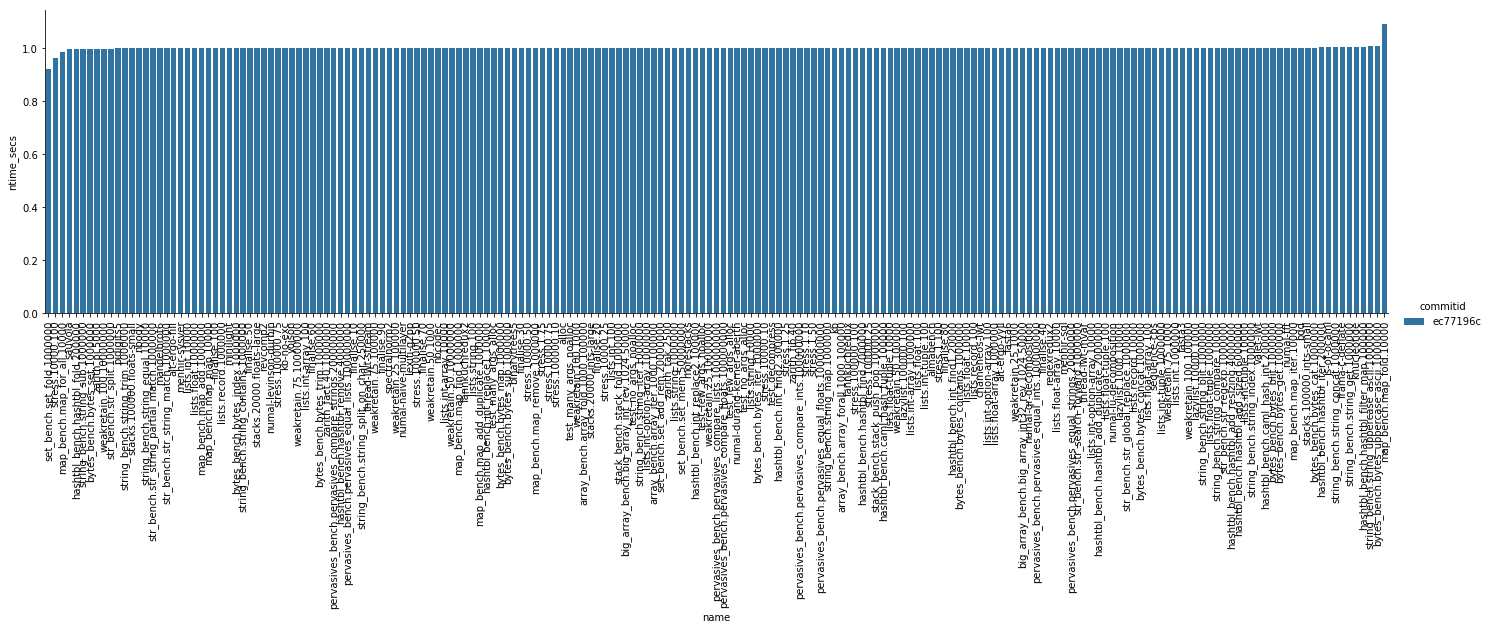

In [9]:
ndf = normalize(df,base_commitid,'time_secs')
ndf.sort_values(by=['ntime_secs'],inplace=True)
g = sns.catplot (x='name', y='ntime_secs', hue='commitid', data = ndf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

## Major words

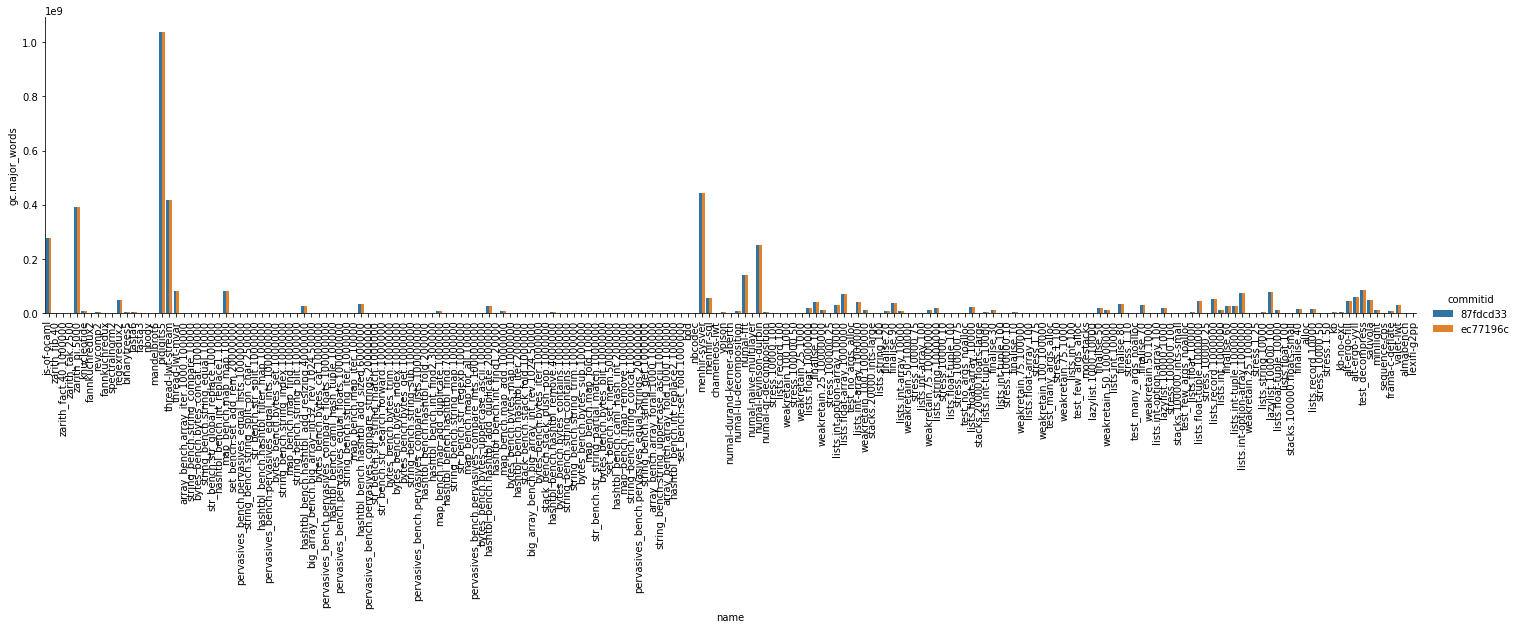

In [10]:
g = sns.catplot (x='name', y='gc.major_words', hue='commitid', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

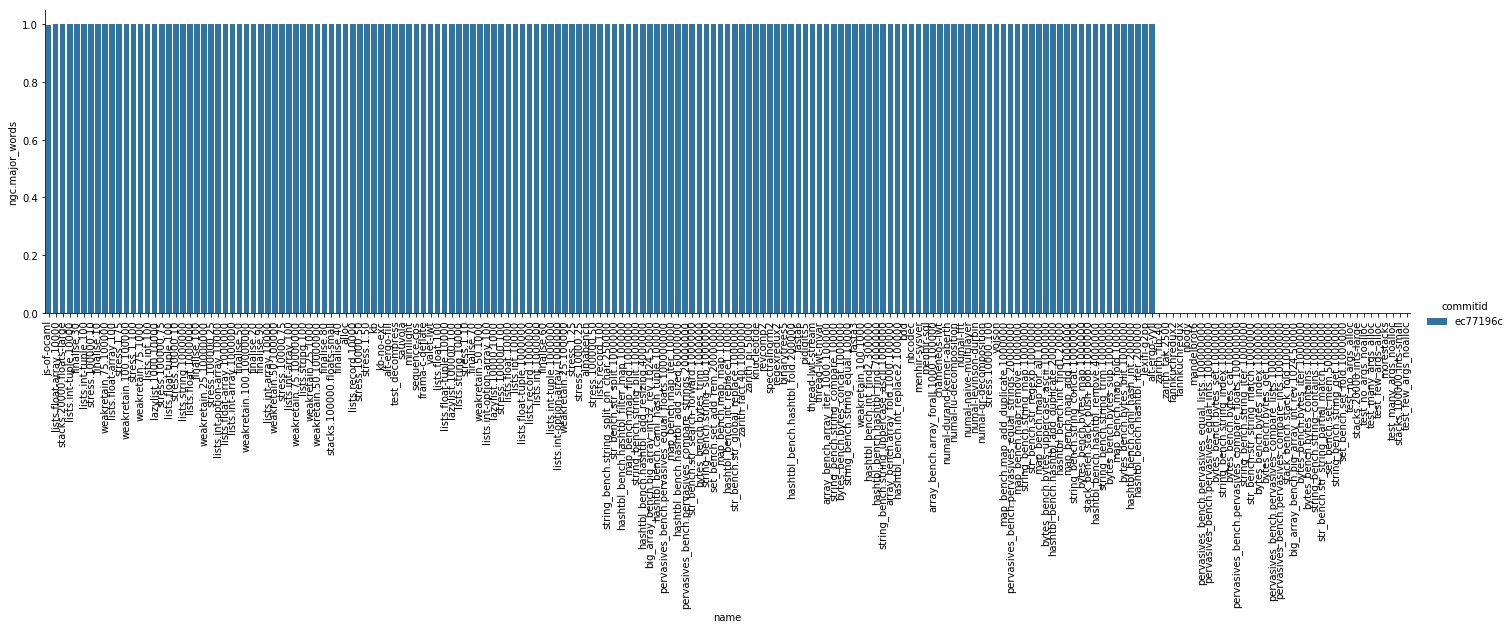

In [11]:
ndf = normalize(df,base_commitid,'gc.major_words')
ndf.sort_values(by=['ngc.major_words'],inplace=True)
g = sns.catplot (x='name', y='ngc.major_words', hue='commitid', data = ndf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)